[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Figures 12.19 and 12.20, and Exercise 12.11

Illustration of sparse regression and the lasso for a simple example with just two features, where the response is a linear function of only one of the features corrupted by additive noise\
Topics: Sparse regression, sparsity, lasso, regularization

Author: Carlos Fernandez-Granda

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
from numpy.random import default_rng
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
font_size = 15
font_size_ticks = 15
np.set_printoptions(precision=5)

msize = 50
beta_x_min = -0.05
beta_x_max = 1.2
beta_y_min = -0.5
beta_y_max = 0.5

OLS coefficients [0.81177 0.19297]


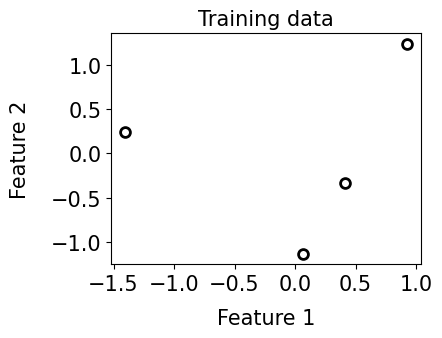

In [5]:
rng = default_rng(2023) #12345 #2025
n = 4
rho = 0 
cov_matrix = np.array([[1,rho],[rho,1]])
sigma = 0.6
true_beta = np.array([1,0])

eigvals_cov,eigvecs_cov = np.linalg.eig(cov_matrix)
coloring_matrix = eigvecs_cov @ np.diag(np.sqrt(eigvals_cov)) 
iid_gaussian = rng.standard_normal(size=(2,n))
X_raw = coloring_matrix @ iid_gaussian 
X_unnorm = X_raw - X_raw.mean(axis=1, keepdims=True)
std_rows = np.std(X_unnorm,ddof=1,axis=1)
X = X_unnorm / std_rows[:,None] 

z = sigma * rng.standard_normal(n)
y = X.T @ true_beta + z

linear_model = LinearRegression(fit_intercept=False).fit(X.T, y)
print("OLS coefficients",linear_model.coef_)

plt.figure(figsize=(4,3))
plt.scatter(X[0,:],X[1,:],s=msize,color="white",edgecolor='black',lw=2, rasterized=True)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.xlabel('Feature 1',fontsize=font_size,labelpad = 10)
plt.ylabel('Feature 2',fontsize=font_size,labelpad = 15)
plt.title("Training data",fontsize=font_size);

In [23]:
# Numerical verification of the theoretical derivation in Exercise 12.11
rho = X[0,:] @ X[1,:].T / (n-1)
c_X_z = X @ z / (n-1)
lambda_n_min = 2 * np.abs(rho * c_X_z[0]-c_X_z[1])/(1-rho)
lambda_min = lambda_n_min * (n-1)
print("Minimum lambda",round(lambda_min,3))
lambda_n_max = 2* (true_beta[0] + c_X_z[0])
lambda_max = lambda_n_max* (n-1)
print("Maximum lambda",round(lambda_max,3))

lambda_val = 3
alpha_val = lambda_val / 2 / n

a_pred = true_beta[0] + c_X_z[0] - lambda_val/(n-1)/2
print("Predicted estimate ",round(a_pred,5))
lasso_lambda = Lasso(alpha=alpha_val,fit_intercept=False)
lasso_model = lasso_lambda.fit(X.T, y)
print("Lasso solution",np.round(lasso_model.coef_,5))

Minimum lambda 1.39
Maximum lambda 5.103
Predicted estimate  0.35051
Lasso solution [0.35051 0.     ]


/Users/carlos/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/carlos/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/carlos/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.598e-01, tolerance: 2.597e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  

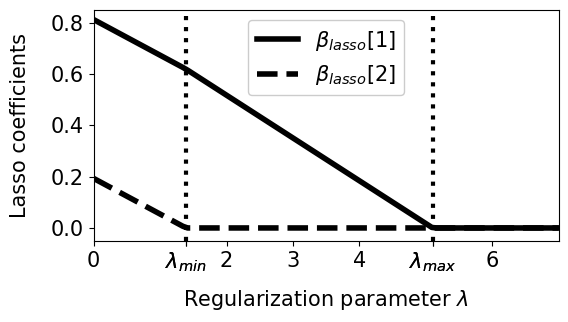

In [11]:
# Dependence of the lasso coefficients on the regularization parameter
# The second coefficient is correctly estimated to equal zero as long as the parameter is not too small
n_grid = 100
lambda_grid_min = 0 
lambda_grid_max = 7
lambda_grid = np.linspace(lambda_grid_min,lambda_grid_max,n_grid)
ymax = 0.85
ymin = -0.05
a = np.zeros(n_grid)
b = np.zeros(n_grid)

for ind,lambda_val in enumerate(lambda_grid):
    alpha_val = lambda_val / 2 / n
    lasso_lambda = Lasso(alpha=alpha_val,fit_intercept=False)
    lasso_model = lasso_lambda.fit(X.T, y)
    a[ind] = lasso_model.coef_[0]
    b[ind] = lasso_model.coef_[1]    
    
plt.figure(figsize=(6,3))
plt.plot(lambda_grid,a,color="black",lw=2, ls="solid",label=r"$\beta_{lasso}[1]$")
plt.plot(lambda_grid,b,color="black",lw=2, ls="dashed",label=r"$\beta_{lasso}[2]$")
plt.vlines(lambda_min,ymin,ymax,ls = "dotted",lw=3,color="black")
plt.vlines(lambda_max,ymin,ymax,ls = "dotted",lw=3,color="black")
plt.xticks([0,lambda_min,2,3,4,lambda_max,6],["0",r"$\lambda_{min}$","2","3","4",r"$\lambda_{max}$","6"],fontsize=font_size_ticks) 
plt.yticks(np.arange(0,1,0.2),fontsize=font_size_ticks)
plt.ylim([ymin,ymax])
plt.xlim([lambda_grid_min,lambda_grid_max])
plt.xticks(list(plt.xticks()[0]) + [lambda_min,lambda_max])
plt.xlabel(r'Regularization parameter $\lambda$',fontsize=font_size,labelpad = 10)
plt.ylabel('Lasso coefficients',fontsize=font_size,labelpad = 15)
plt.legend(fontsize=font_size,framealpha=1,loc="upper center");

1.6


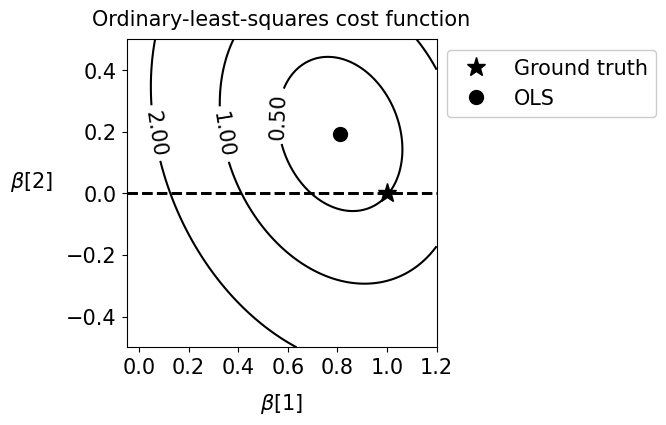

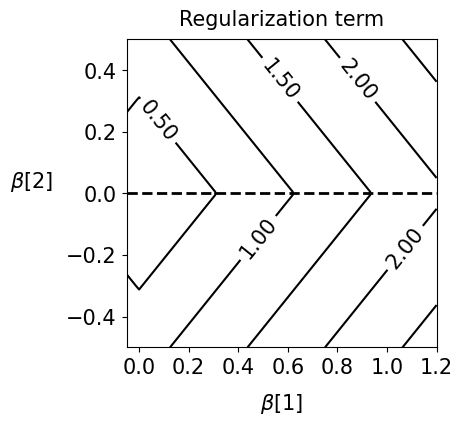

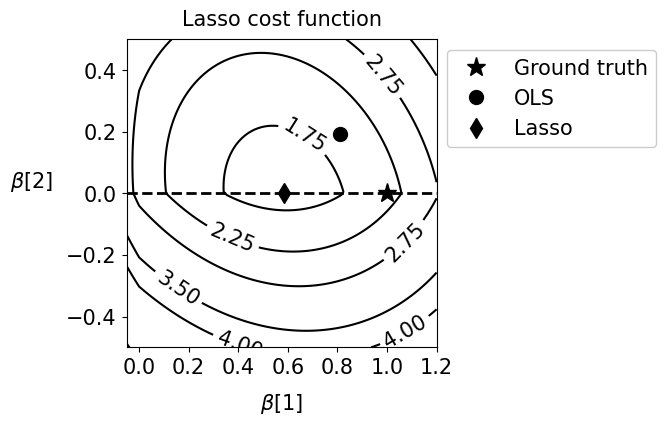

In [14]:
# Cost function of the lasso
markersize = 10

beta_grid_1 = np.linspace(beta_x_min, beta_x_max, 100)
beta_grid_2 = np.linspace(beta_y_min, beta_y_max, 100)

def OLS(beta_1,beta_2):
    return (np.sum((y-X[0,:]*beta_1-X[1,:]*beta_2)**2))

def reg_l1(beta_1,beta_2,lambda_val):
    return lambda_val*(np.abs(beta_1) + np.abs(beta_2))

def lasso(beta_1,beta_2,lambda_val):
    return (np.sum((y-X[0,:]*beta_1-X[1,:]*beta_2)**2) + lambda_val*(np.abs(beta_1) + np.abs(beta_2)))

grid_1, grid_2 = np.meshgrid(beta_grid_1, beta_grid_2)

OLS_vec=np.vectorize(OLS)
grid_OLS = OLS_vec(grid_1,grid_2)

linear_model = LinearRegression(fit_intercept=False).fit(X.T, y)
beta_OLS = linear_model.coef_

level_list = [0.05,0.1,0.25,0.5,1,2,5,10,20]
manual_locations = [(0.6, 0.25), (0.4, 0.2), (0.1, 0.2)]

fig = plt.figure(figsize = (4,4)) 
CS = plt.contour(grid_1, grid_2, grid_OLS, levels = level_list,colors='black')#levels=30,cmap='RdGy',alpha=1);
plt.plot(true_beta[0],true_beta[1],ls="None",color='black',ms=markersize+4,marker="*",label="Ground truth")
plt.plot(beta_OLS[0],beta_OLS[1],ls="None",color='black',ms=markersize,marker="o",label="OLS")
plt.hlines(0,beta_x_min,beta_x_max,lw=2,ls="dashed",color="black")
plt.clabel(CS, fontsize=font_size_ticks, inline=1,fmt = '%1.2f', manual=manual_locations)#,ticks=Contourrange)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.hlines(0,beta_x_min,beta_x_max,lw=2,ls="dashed",color="black")
plt.xlabel(r'$\beta[1]$', fontsize=font_size,labelpad=10)
h = plt.ylabel(r'$\beta [2] $', fontsize=font_size,labelpad=25)
h.set_rotation(0)
plt.legend(fontsize=font_size_ticks,framealpha=1,bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.title("Ordinary-least-squares cost function",fontsize=font_size,pad=10)

level_list = [0.5,1,1.5,2,2.5,5,7.5,10,12.5,15,20]

lambda_val = 1.6
print(lambda_val)

grid_reg = reg_l1(grid_1,grid_2,lambda_val)

fig = plt.figure(figsize = (4,4)) 
CS = plt.contour(grid_1, grid_2, grid_reg, levels = level_list,colors='black')#levels=30,cmap='RdGy',alpha=1);
plt.hlines(0,beta_x_min,beta_x_max,lw=2,ls="dashed",color="black")
plt.clabel(CS, fontsize=font_size_ticks, inline=1,fmt = '%1.2f')#,ticks=Contourrange)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.xlabel(r'$\beta[1]$', fontsize=font_size,labelpad=10)
h = plt.ylabel(r'$\beta [2] $', fontsize=font_size,labelpad=25)
h.set_rotation(0)
plt.title("Regularization term",fontsize=font_size,pad=10)

level_list = [0.25,0.5,1,1.75,2.25,2.75,3.5,4,5.5,6,7.5,10,15,25]

lasso_vec=np.vectorize(lasso)
grid_lasso = lasso_vec(grid_1,grid_2,lambda_val)

lasso_lambda = Lasso(alpha=lambda_val/2/n,fit_intercept=False)
lasso_model = lasso_lambda.fit(X.T, y)
beta_lasso = lasso_model.coef_

fig = plt.figure(figsize = (4,4)) 
CS = plt.contour(grid_1, grid_2, grid_lasso, levels = level_list,colors='black')#levels=30,cmap='RdGy',alpha=1);
plt.plot(true_beta[0],true_beta[1],ls="None",color='black',ms=markersize+4,marker="*",label="Ground truth")
plt.hlines(0,beta_x_min,beta_x_max,lw=2,ls="dashed",color="black")
plt.plot(beta_OLS[0],beta_OLS[1],ls="None",color='black',ms=markersize,marker="o",label="OLS")
plt.plot(beta_lasso[0],beta_lasso[1],ls="None",color='black',ms=markersize,marker="d",label="Lasso")
plt.clabel(CS, fontsize=font_size_ticks, inline=1,fmt = '%1.2f')
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.xlabel(r'$\beta[1]$', fontsize=font_size,labelpad=10)
h = plt.ylabel(r'$\beta [2] $', fontsize=font_size,labelpad=25)
h.set_rotation(0)
plt.legend(fontsize=font_size_ticks,framealpha=1,bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.title("Lasso cost function",fontsize=font_size,pad=10);

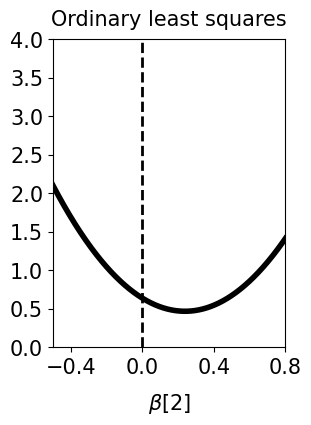

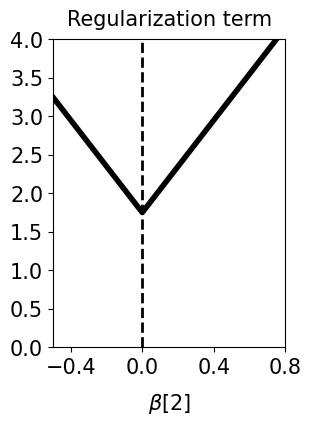

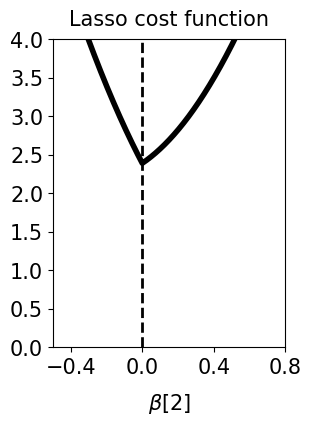

In [24]:
# Slice of the cost function of the lasso, showing why it induces sparsity
y_min = 0
y_max = 4
zoom_min = -0.5
zoom_max = 0.8
beta_grid_zoom = np.linspace(zoom_min, zoom_max, 10000)

tick_aux = np.arange(-0.4,0.8,0.4)

def OLS_1d(beta_2):
    return (np.sum((y-X[0,:]*beta_lasso[0]-X[1,:]*beta_2)**2))

def reg_l1_1d(beta_2,lambda_val):
    return (lambda_val*(np.abs(beta_lasso[0]) + np.abs(beta_2)))

def lasso_1d(beta_2,lambda_val):
    return (np.sum((y-X[0,:]*beta_lasso[0]-X[1,:]*beta_2)**2) + lambda_val*(np.abs(beta_lasso[0]) + np.abs(beta_2)))

OLS_1d_vec=np.vectorize(OLS_1d)
grid_OLS_1d = OLS_1d_vec(beta_grid_zoom)
reg_1d_vec=np.vectorize(reg_l1_1d)
grid_reg_1d = reg_1d_vec(beta_grid_zoom,lambda_val)
lasso_1d_vec=np.vectorize(lasso_1d)
grid_lasso_1d = lasso_1d_vec(beta_grid_zoom,lambda_val)

plt.figure(figsize=(3,4))
plt.plot(beta_grid_zoom,grid_OLS_1d,lw=4,
         color="black",ls="solid",label="OLS")
plt.xticks(tick_aux,fontsize=font_size) 
plt.yticks(fontsize=font_size)
plt.xlim([zoom_min,zoom_max])
plt.ylim([y_min,y_max])
plt.vlines(0,y_min,y_max,lw=2,color="black",ls="dashed")
plt.xlabel(r'$\beta[2]$', fontsize=font_size,labelpad=10)
plt.title("Ordinary least squares",fontsize=font_size,pad=10)

plt.figure(figsize=(3,4))
plt.plot(beta_grid_zoom,grid_reg_1d,lw=4,
         color="black",ls="solid",label="OLS")
plt.xticks(tick_aux,fontsize=font_size) 
plt.yticks(fontsize=font_size)
plt.xlim([zoom_min,zoom_max])
plt.ylim([y_min,y_max])
plt.vlines(0,y_min,y_max,lw=2,color="black",ls="dashed")
plt.xlabel(r'$\beta[2]$', fontsize=font_size,labelpad=10)
plt.title("Regularization term",fontsize=font_size,pad=10)

plt.figure(figsize=(3,4))
plt.plot(beta_grid_zoom,grid_lasso_1d,lw=4,
         color="black",ls="solid",label="OLS")
plt.xticks(tick_aux,fontsize=font_size) 
plt.yticks(fontsize=font_size)
plt.xlim([zoom_min,zoom_max])
plt.ylim([y_min,y_max])
plt.vlines(0,y_min,y_max,lw=2,color="black",ls="dashed")
plt.xlabel(r'$\beta[2]$', fontsize=font_size,labelpad=10)
plt.title("Lasso cost function",fontsize=font_size,pad=10);